California Housing dataset successfully loaded.
First few rows of features:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25   

Target values (first 5): [4.526 3.585 3.521 3.413 3.422]

Data dimensions:
X_train: (16512, 8) X_test: (4128, 8)

=== Linear Regression ===
MSE: 0.5559
R²: 0.5758

=== Ridge Regression ===
Best alpha: 0.5689866029018293
MSE: 0.5559
R²: 0.5758

=== Lasso Regression ===
Best alpha: 0.0006551285568595509
MSE: 0.5549
R²: 0.5765

Coefficients from Linear Regression:
MedInc     

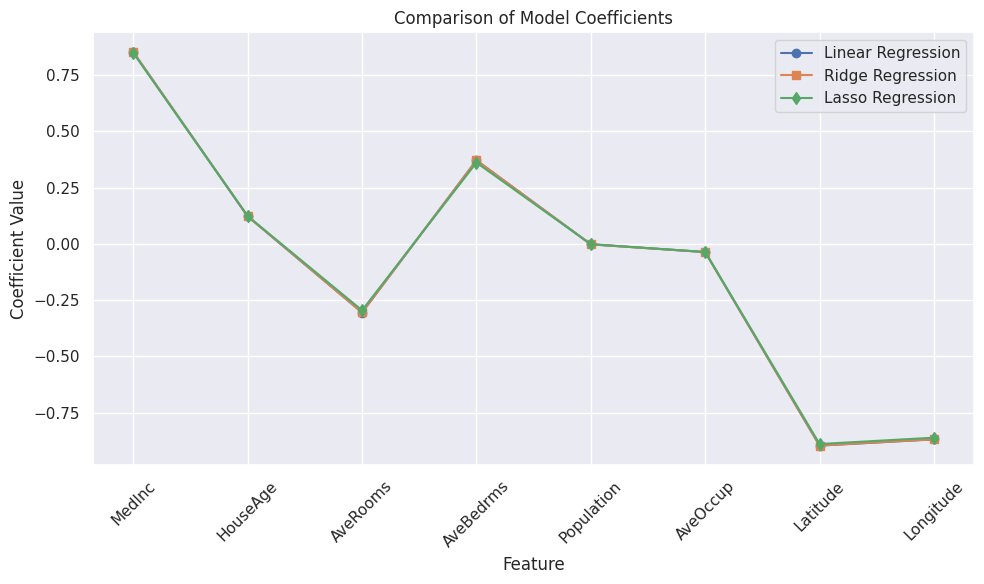

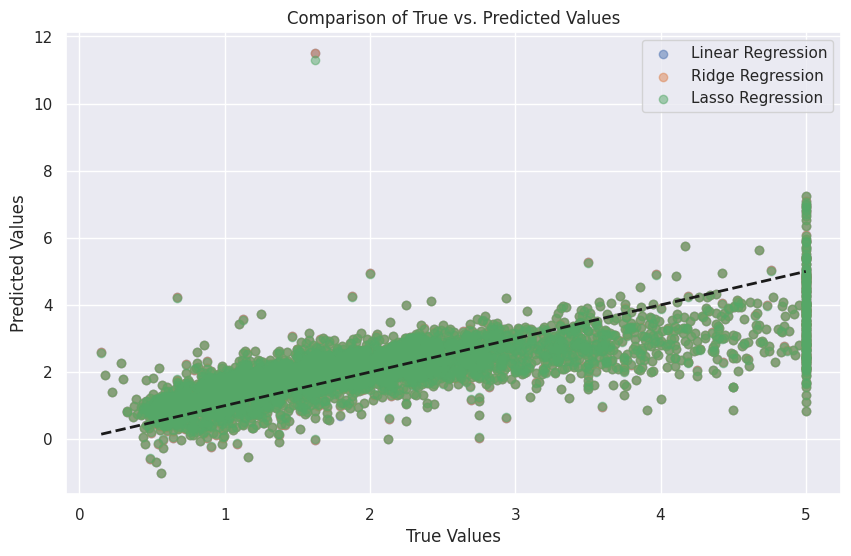


Final Remarks:
- The baseline Linear Regression provides a reference point.
- Ridge and Lasso apply penalties that shrink the magnitude of coefficients, which can help prevent overfitting.
- The alpha parameter in Ridge and Lasso controls the strength of regularization; it is critical to tune this parameter.
- The number of cross-validation folds (cv) in GridSearchCV, the alpha range, and Lasso's max_iter are all tunable parameters.
- You can also try different scalers or adjust the train-test split settings to further optimize model performance.



In [7]:
# =============================================================================
# Machine Learning with Ridge and Lasso Regression: A Complete Example
# =============================================================================
#
# Objective:
# This script demonstrates how to predict the median house value using the California Housing dataset.
# We compare a baseline Linear Regression model with regularized models (Ridge and Lasso)
# to show how regularization can handle multicollinearity and improve generalization.
#
# Methodology:
# 1. Load the California Housing dataset.
# 2. Preprocess the data by scaling the features.
# 3. Split the data into training and test sets.
# 4. Train a baseline Linear Regression model.
# 5. Train Ridge and Lasso models using GridSearchCV for hyperparameter tuning.
# 6. Compare performance using MSE and R² metrics.
# 7. Analyze the coefficients to see the effect of regularization.
#
# Tunable Parameters:
# - Preprocessing: You can change the scaler (StandardScaler, MinMaxScaler, etc.).
# - Train/Test Split: Change test_size and random_state.
# - GridSearchCV: Adjust the range of alpha values and the number of CV folds.
# - Lasso: Adjust max_iter to ensure convergence.
#
# =============================================================================

# -------------------------
# 1. Import Libraries and Load Dataset
# -------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("California Housing dataset successfully loaded.")
print("First few rows of features:")
print(X.head(), "\n")
print("Target values (first 5):", y[:5])

# -------------------------
# 2. Data Preprocessing: Feature Scaling
# -------------------------
# Scaling is essential for regularized models as it ensures that all features are on the same scale.
scaler = StandardScaler()  # You can try other scalers (e.g., MinMaxScaler) as well.
X_scaled = scaler.fit_transform(X)

# -------------------------
# 3. Train-Test Split
# -------------------------
# Split the data into training (80%) and test (20%) sets.
# You can adjust test_size and random_state to change the split.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("\nData dimensions:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# -------------------------
# 4. Baseline Model: Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("\n=== Linear Regression ===")
print("MSE: {:.4f}".format(lr_mse))
print("R²: {:.4f}".format(lr_r2))

# -------------------------
# 5. Ridge Regression with GridSearchCV
# -------------------------
# Define a grid of alpha values to search over.
# You can change the range and number of alpha values here.
ridge = Ridge()
params = {'alpha': np.logspace(-4, 4, 50)}  # Tunable parameter: alpha range
ridge_cv = GridSearchCV(
    ridge, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("\n=== Ridge Regression ===")
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("MSE: {:.4f}".format(ridge_mse))
print("R²: {:.4f}".format(ridge_r2))

# -------------------------
# 6. Lasso Regression with GridSearchCV
# -------------------------
# Lasso may require a higher max_iter to converge.
# You can adjust max_iter and the grid for alpha as needed.
lasso = Lasso(max_iter=10000)  # Tunable parameter: max_iter for Lasso
lasso_cv = GridSearchCV(
    lasso, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("\n=== Lasso Regression ===")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("MSE: {:.4f}".format(lasso_mse))
print("R²: {:.4f}".format(lasso_r2))

# -------------------------
# 7. Comparing Model Coefficients
# -------------------------
coef_lr = pd.Series(lr.coef_, index=housing.feature_names)
coef_ridge = pd.Series(ridge_cv.best_estimator_.coef_, index=housing.feature_names)
coef_lasso = pd.Series(lasso_cv.best_estimator_.coef_, index=housing.feature_names)

print("\nCoefficients from Linear Regression:")
print(coef_lr)
print("\nCoefficients from Ridge Regression:")
print(coef_ridge)
print("\nCoefficients from Lasso Regression:")
print(coef_lasso)

# Visualize coefficients to highlight the impact of regularization
plt.figure(figsize=(10, 6))
plt.plot(coef_lr, 'o-', label='Linear Regression')
plt.plot(coef_ridge, 's-', label='Ridge Regression')
plt.plot(coef_lasso, 'd-', label='Lasso Regression')
plt.xticks(range(len(housing.feature_names)), housing.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# 8. Visualizing Predictions
# -------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of True vs. Predicted Values')
plt.legend()
plt.show()

# -------------------------
# 9. Final Remarks and Tunable Parameters
# -------------------------
print("""
Final Remarks:
- The baseline Linear Regression provides a reference point.
- Ridge and Lasso apply penalties that shrink the magnitude of coefficients, which can help prevent overfitting.
- The alpha parameter in Ridge and Lasso controls the strength of regularization; it is critical to tune this parameter.
- The number of cross-validation folds (cv) in GridSearchCV, the alpha range, and Lasso's max_iter are all tunable parameters.
- You can also try different scalers or adjust the train-test split settings to further optimize model performance.
""")


To optimize your model's performance, you can tune several hyperparameters and configuration options. Here are the key parameters you can adjust, along with some guidance on reasonable values:

Regularization Parameter (alpha):
What it does: Controls the strength of the penalty in both Ridge (L2) and Lasso (L1) regression.
Tuning: Use a logarithmic scale (e.g., using np.logspace(-4, 4, 50)) to explore a wide range—from very weak to very strong regularization.
Reasonable values: Start with values between 10⁻⁴ and 10⁴; then narrow down based on performance.

Cross-Validation Folds (cv):
What it does: Determines how many splits are used to validate the model during hyperparameter tuning.
Tuning: Common choices are cv=5 or cv=10.
Reasonable values:
cv=5: Often a good balance between reliability and computational cost.
cv=10: Provides a more robust estimation if you have enough data and can afford the extra computation.

Maximum Iterations (max_iter) for Lasso:
What it does: Sets the maximum number of iterations for the solver to converge.
Tuning: If you see convergence warnings or if your model doesn't converge, increase this value.
Reasonable values: Typically, max_iter=10000 is a good starting point, but you may need to set it higher for complex or larger datasets.

Tolerance (tol):
What it does: Defines the stopping criterion for the solver (i.e., when the improvement is small enough, the algorithm stops).
Tuning: Lower tolerance means more precise convergence but may require more iterations.
Reasonable values: The default is usually adequate, but you might try values like 1e-4 or 1e-5 if needed.

Feature Scaling:
What it does: Scaling ensures all features contribute equally to the regularization penalty.
Tuning: Experiment with different scalers (e.g., StandardScaler, MinMaxScaler, or RobustScaler) to see which one yields better performance.

Train-Test Split Parameters:
What it does: Affects the size of the training and test sets.
Tuning: Adjust the test_size (common values are 20% to 30%) and random_state (for reproducibility) based on your dataset size and variability.
